<a id='pd'></a>  
# Pandas DataFrames
- pandas provides two standardized data structures for tabular data  
  - Series — A one-dimensional structure, used to represent a vector, i.e., a table column
  - DataFrame — A two-dimensional structure, used to represent a table 
    - each column in a DataFrame is a Series
- pandas is an extension of numpy  
  - series are labelled numpy arrays that represent table columns

[Create](#pd-create)    
[Structure](#pd-structure)  
[Import](#pd-import)  
[Explore](#pd-explore)  
[Missing Values](#pd-missing)  
[Plot](#pd-plot)  
[Transform](#pd-transform)  
[Select](#pd-select)  
[Filter](#pd-filter)  
[Summarize](#pd-summarize)    
[Export](#pd-export)  
[Exercise](#pd-exercise) 

## Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Parameters

In [2]:
pd.set_option('display.max_rows',10)
#defaults: pd.set_option('display.max_columns',20,'display.max_rows',60,'display.max_colwidth',50)

## Directories

In [3]:
home_dir = home_dir = os.path.expanduser("~")
work_dir = os.path.join(home_dir, 'eda', 'spdp')
data_dir = os.path.join(work_dir,'data') 
os.chdir(work_dir)
os.getcwd()

'C:\\Users\\rick\\eda\\spdp'

<a id='pd-create'></a>
## Create

[Return to Start of Notebook](#pd)  

### pd.Series

#### from list

In [4]:
val = [1,2,3,4,5]
series_a = pd.Series(val, name = "A")

#### specify index

In [5]:
val = [1,2,3,4,5]
idx = ["A", "B", "C", "D", "E"]
series_b = pd.Series(val, index = idx, name = "B")

#### from numpy array

In [6]:
val = np.array([1, 2, 3, 4, 5])
series_c = pd.Series(val, name = "C")
series_c

0    1
1    2
2    3
3    4
4    5
Name: C, dtype: int32

### pd.DataFrame

In [7]:
ids = ["A", "B", "C"]
ids_sr = pd.Series(ids, name = "ids")

In [8]:
names = ["X", "Y", "Z"]
names_sr = pd.Series(names, name = "names")

In [9]:
coords = [140, 150, 160]
lon_sr = pd.Series(coords)

In [10]:
coords = [0, 10, 20]
lat_sr = pd.Series(coords)

#### from dictionary

In [11]:
d = {"name": names_sr, 
     "lon": lon_sr, 
     "lat": lat_sr}
city_df = pd.DataFrame(d)
city_df

,name,lon,lat
0,X,140,0
1,Y,150,10
2,Z,160,20


<a id='pd-structure'></a>
## Structure

[Return to Start of Notebook](#pd)  

In [12]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   lon     3 non-null      int64 
 2   lat     3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes


### index

In [13]:
type(city_df.index)

pandas.core.indexes.range.RangeIndex

In [14]:
city_df.index

RangeIndex(start=0, stop=3, step=1)

In [15]:
city_df.index.shape

(3,)

In [16]:
city_df.index.dtype

dtype('int64')

### columns

In [17]:
city_df.columns

Index(['name', 'lon', 'lat'], dtype='object')

### values

In [18]:
city_df['lon'].values

array([140, 150, 160], dtype=int64)

In [19]:
type(city_df['lon'].values)

numpy.ndarray

<a id='pd-import'></a>
## Import

[Return to Start of Notebook](#pd)  

### pd. read_csv

#### import all data

In [20]:
df = pd.read_csv("data/ZonAnn.Ts+dSST.csv")
df

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.16,-0.27,-0.04,-0.34,-0.13,-0.01,-0.81,-0.42,-0.26,-0.16,-0.10,-0.02,0.05,0.65
1,1881,-0.07,-0.16,0.01,-0.32,0.10,-0.06,-0.91,-0.39,-0.18,0.09,0.11,-0.04,-0.07,0.58
2,1882,-0.10,-0.20,0.00,-0.28,-0.05,0.02,-1.40,-0.22,-0.13,-0.05,-0.04,0.03,0.04,0.61
3,1883,-0.16,-0.26,-0.06,-0.31,-0.16,0.00,-0.19,-0.51,-0.23,-0.18,-0.15,-0.03,0.07,0.48
4,1884,-0.28,-0.42,-0.14,-0.59,-0.15,-0.13,-1.31,-0.60,-0.46,-0.13,-0.16,-0.18,-0.02,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2016,1.02,1.31,0.73,1.55,1.02,0.49,3.26,1.44,1.08,0.96,1.07,0.67,0.25,0.37
137,2017,0.93,1.18,0.67,1.40,0.82,0.59,2.54,1.38,1.05,0.87,0.78,0.76,0.34,0.52
138,2018,0.85,1.05,0.66,1.26,0.68,0.68,2.17,1.10,1.06,0.73,0.63,0.80,0.37,0.93
139,2019,0.99,1.22,0.75,1.43,0.91,0.65,2.72,1.44,1.01,0.91,0.90,0.75,0.39,0.85


<a id='pd-explore'></a>
## Explore

[Return to Start of Notebook](#pd)  

### info

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     141 non-null    int64  
 1   Glob     141 non-null    float64
 2   NHem     141 non-null    float64
 3   SHem     141 non-null    float64
 4   24N-90N  141 non-null    float64
 5   24S-24N  141 non-null    float64
 6   90S-24S  141 non-null    float64
 7   64N-90N  141 non-null    float64
 8   44N-64N  141 non-null    float64
 9   24N-44N  141 non-null    float64
 10  EQU-24N  141 non-null    float64
 11  24S-EQU  141 non-null    float64
 12  44S-24S  141 non-null    float64
 13  64S-44S  141 non-null    float64
 14  90S-64S  141 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 16.6 KB


### shape

In [22]:
df.shape

(141, 15)

In [23]:
rows = df.shape[0]

In [24]:
cols = df.shape[1]

### columns

In [25]:
df.columns

Index(['Year', 'Glob', 'NHem', 'SHem', '24N-90N', '24S-24N', '90S-24S',
       '64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S',
       '64S-44S', '90S-64S'],
      dtype='object')

In [26]:
print(list(df.columns))

['Year', 'Glob', 'NHem', 'SHem', '24N-90N', '24S-24N', '90S-24S', '64N-90N', '44N-64N', '24N-44N', 'EQU-24N', '24S-EQU', '44S-24S', '64S-44S', '90S-64S']


### dtypes

In [27]:
df.dtypes

Year         int64
Glob       float64
NHem       float64
SHem       float64
24N-90N    float64
            ...   
EQU-24N    float64
24S-EQU    float64
44S-24S    float64
64S-44S    float64
90S-64S    float64
Length: 15, dtype: object

In [28]:
df.dtypes.loc['Glob']

dtype('float64')

<a id='pd-missing'></a>
## Missing Values

[Return to Start of Notebook](#pd)  

In [29]:
students = pd.read_csv("data/students.csv")
students.head(3)

,year,Ariel University,Weizmann Institute of Science,Ben-Gurion Univ. of the Negev,Haifa University,Bar-Ilan University,Tel-Aviv University,Technion,Hebrew University
0,1969/70,NaN,419.0,1297,2794,4273,7958,6045,12588
1,1974/75,NaN,580.0,3247,4713,6527,12813,8453,13516
2,1979/80,NaN,490.0,4250,6140,8070,14380,7580,13570


### .isna()

#### DataFrame

In [30]:
students.isna()

,year,Ariel University,Weizmann Institute of Science,Ben-Gurion Univ. of the Negev,Haifa University,Bar-Ilan University,Tel-Aviv University,Technion,Hebrew University
0,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,True,True,False,False,False,False,False,False
4,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
38,False,False,False,False,False,False,False,False,False
39,False,True,True,False,False,False,False,False,False
40,False,False,True,False,False,False,False,False,False
41,False,False,False,False,False,False,False,False,False


#### Column

In [31]:
filt = students["Ariel University"].isna()
sel = students[filt]

### .notna()

In [32]:
filt = students["Ariel University"].notna()
sel = students[filt]

### .isna().any()

In [33]:
students.isna().any()

year                             False
Ariel University                  True
Weizmann Institute of Science     True
Ben-Gurion Univ. of the Negev    False
Haifa University                 False
Bar-Ilan University              False
Tel-Aviv University              False
Technion                         False
Hebrew University                False
dtype: bool

### .isna().sum()

In [34]:
students.isna().sum()

year                              0
Ariel University                 39
Weizmann Institute of Science     6
Ben-Gurion Univ. of the Negev     0
Haifa University                  0
Bar-Ilan University               0
Tel-Aviv University               0
Technion                          0
Hebrew University                 0
dtype: int64

### .fillna

In [35]:
students["Ariel University"].fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
       ...   
38    10977.0
39        0.0
40    11899.0
41    11741.0
42    12016.0
Name: Ariel University, Length: 43, dtype: float64

In [36]:
students["Ariel University"] = students["Ariel University"].fillna(0)
students.head()

,year,Ariel University,Weizmann Institute of Science,Ben-Gurion Univ. of the Negev,Haifa University,Bar-Ilan University,Tel-Aviv University,Technion,Hebrew University
0,1969/70,0.0,419.0,1297,2794,4273,7958,6045,12588
1,1974/75,0.0,580.0,3247,4713,6527,12813,8453,13516
2,1979/80,0.0,490.0,4250,6140,8070,14380,7580,13570
3,1980/81,0.0,NaN,4430,6040,8670,14860,7620,13770
4,1981/82,0.0,NaN,4500,6055,8730,15770,7650,14000


### to np.nan

In [37]:
students.loc[students["Ariel University"] == 0, "Ariel University"] = np.nan
students.head()

,year,Ariel University,Weizmann Institute of Science,Ben-Gurion Univ. of the Negev,Haifa University,Bar-Ilan University,Tel-Aviv University,Technion,Hebrew University
0,1969/70,NaN,419.0,1297,2794,4273,7958,6045,12588
1,1974/75,NaN,580.0,3247,4713,6527,12813,8453,13516
2,1979/80,NaN,490.0,4250,6140,8070,14380,7580,13570
3,1980/81,NaN,NaN,4430,6040,8670,14860,7620,13770
4,1981/82,NaN,NaN,4500,6055,8730,15770,7650,14000


### .dropna

In [38]:
students.dropna()

,year,Ariel University,Weizmann Institute of Science,Ben-Gurion Univ. of the Negev,Haifa University,Bar-Ilan University,Tel-Aviv University,Technion,Hebrew University
38,2015/16,10977.0,1104.0,17918,18027,20621,26643,14240,20171
41,2018/19,11741.0,1148.0,17699,17570,17340,26361,13611,19837
42,2019/20,12016.0,1215.0,17820,17396,17764,26570,13787,20898


<a id='pd-plot'></a>
## Plot

[Return to Start of Notebook](#pd)  

### pandas line plot

<AxesSubplot:>

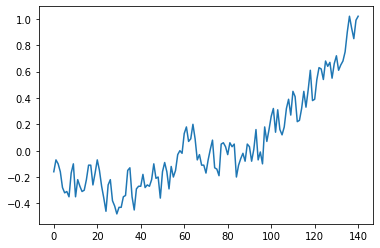

In [39]:
df["Glob"].plot()

#### with set_index

<AxesSubplot:xlabel='Year'>

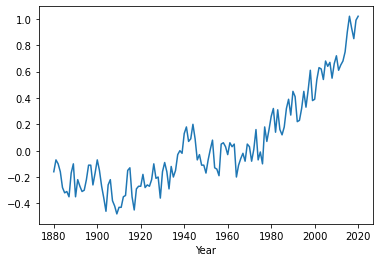

In [40]:
df.set_index("Year")["Glob"].plot()

#### multiple columns

<AxesSubplot:xlabel='Year'>

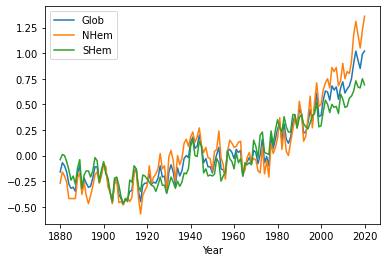

In [41]:
df.set_index("Year")[["Glob", "NHem", "SHem"]].plot()

### pandas scatterplot

<AxesSubplot:xlabel='NHem', ylabel='SHem'>

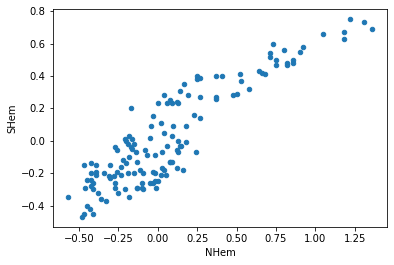

In [42]:
df.plot.scatter(x = "NHem", y = "SHem")

<a id='pd-transform'></a>
## Transform

[Return to Start of Notebook](#pd)  

### columns

#### rename

In [43]:
df.rename(columns = {"Year": "year"}, inplace=True)
df.head(3)

,year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.16,-0.27,-0.04,-0.34,-0.13,-0.01,-0.81,-0.42,-0.26,-0.16,-0.10,-0.02,0.05,0.65
1,1881,-0.07,-0.16,0.01,-0.32,0.10,-0.06,-0.91,-0.39,-0.18,0.09,0.11,-0.04,-0.07,0.58
2,1882,-0.10,-0.20,0.00,-0.28,-0.05,0.02,-1.40,-0.22,-0.13,-0.05,-0.04,0.03,0.04,0.61


In [44]:
df.rename(columns = {"year": "Year"}, inplace=True)
df.head(3)

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.16,-0.27,-0.04,-0.34,-0.13,-0.01,-0.81,-0.42,-0.26,-0.16,-0.10,-0.02,0.05,0.65
1,1881,-0.07,-0.16,0.01,-0.32,0.10,-0.06,-0.91,-0.39,-0.18,0.09,0.11,-0.04,-0.07,0.58
2,1882,-0.10,-0.20,0.00,-0.28,-0.05,0.02,-1.40,-0.22,-0.13,-0.05,-0.04,0.03,0.04,0.61


#### new column

In [45]:
df["diff"] = df["NHem"] - df["SHem"]
df.head(3)

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S,diff
0,1880,-0.16,-0.27,-0.04,-0.34,-0.13,-0.01,-0.81,-0.42,-0.26,-0.16,-0.10,-0.02,0.05,0.65,-0.23
1,1881,-0.07,-0.16,0.01,-0.32,0.10,-0.06,-0.91,-0.39,-0.18,0.09,0.11,-0.04,-0.07,0.58,-0.17
2,1882,-0.10,-0.20,0.00,-0.28,-0.05,0.02,-1.40,-0.22,-0.13,-0.05,-0.04,0.03,0.04,0.61,-0.20


#### drop column

In [46]:
df = df.drop(["diff"], axis = 1)
df.head(3)

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.16,-0.27,-0.04,-0.34,-0.13,-0.01,-0.81,-0.42,-0.26,-0.16,-0.10,-0.02,0.05,0.65
1,1881,-0.07,-0.16,0.01,-0.32,0.10,-0.06,-0.91,-0.39,-0.18,0.09,0.11,-0.04,-0.07,0.58
2,1882,-0.10,-0.20,0.00,-0.28,-0.05,0.02,-1.40,-0.22,-0.13,-0.05,-0.04,0.03,0.04,0.61


### index

#### set index

##### series .index =

In [47]:
ids_sr

0    A
1    B
2    C
Name: ids, dtype: object

In [48]:
ids_sr.index = ["a", "b", "c"]
ids_sr

a    A
b    B
c    C
Name: ids, dtype: object

##### dataframe .set_index()

In [49]:
city_df

,name,lon,lat
0,X,140,0
1,Y,150,10
2,Z,160,20


In [50]:
city_df = city_df.set_index("name", drop = True)
city_df

,lon,lat
name,,
X,140,0
Y,150,10
Z,160,20


#### .reset_index

In [51]:
ids_sr

a    A
b    B
c    C
Name: ids, dtype: object

##### series

In [52]:
ids_sr.reset_index(drop = True)

0    A
1    B
2    C
Name: ids, dtype: object

##### dataframe

In [53]:
city_df = city_df.reset_index()
city_df

,name,lon,lat
0,X,140,0
1,Y,150,10
2,Z,160,20


### sort

In [54]:
df_sort = df.copy()
df_sort.sort_values(by = "Glob",inplace=True)
df_sort.head(3)

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
29,1909,-0.48,-0.48,-0.47,-0.52,-0.48,-0.44,-0.74,-0.59,-0.42,-0.43,-0.52,-0.37,-0.52,-0.55
24,1904,-0.46,-0.47,-0.45,-0.49,-0.46,-0.43,-0.14,-0.57,-0.54,-0.43,-0.49,-0.36,-0.49,-1.30
37,1917,-0.45,-0.57,-0.35,-0.49,-0.63,-0.18,-0.81,-0.48,-0.42,-0.69,-0.57,-0.22,-0.09,0.08


In [55]:
df_sort = df.copy()
df_sort.sort_values(by = "Glob", inplace=True, ascending=False)
df_sort.head(3)

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
140,2020,1.02,1.36,0.69,1.68,0.87,0.57,2.91,1.82,1.20,0.89,0.85,0.58,0.39,0.91
136,2016,1.02,1.31,0.73,1.55,1.02,0.49,3.26,1.44,1.08,0.96,1.07,0.67,0.25,0.37
139,2019,0.99,1.22,0.75,1.43,0.91,0.65,2.72,1.44,1.01,0.91,0.90,0.75,0.39,0.85


<a id='pd-select'></a>
## Select

[Return to Start of Notebook](#pd)  

### Series

#### .loc

In [56]:
s = pd.Series([11, 12, 13, 14], index = ["a", "b", "c", "d"])
s

a    11
b    12
c    13
d    14
dtype: int64

In [57]:
s.loc["a"]

11

In [58]:
s.loc["b":"c"]

b    12
c    13
dtype: int64

In [59]:
s.loc[["a", "c"]]

a    11
c    13
dtype: int64

#### .iloc

In [60]:
s.iloc[0]

11

In [61]:
s.iloc[1:3]

b    12
c    13
dtype: int64

In [62]:
s.iloc[[0, 2]]

a    11
c    13
dtype: int64

##### single value as series

In [63]:
s.iloc[[0]]

a    11
dtype: int64

In [64]:
s = s.reset_index(drop = True)
s

0    11
1    12
2    13
3    14
dtype: int64

### DataFrames

A DataFrame is a two-dimensional object, unlike a Series which is one-dimensional.  
Accordingly, the .loc and iloc methods of a DataFrame accept two indices, separated by a comma:
- The first index refers to rows
- The second index refers to columns

#### single column all rows .loc

##### as series

In [65]:
sel = df.loc[:, "Glob"]

In [66]:
type(sel)

pandas.core.series.Series

##### as dataframe

In [67]:
sel = df.loc[:, ["Glob"]]

In [68]:
type(sel)

pandas.core.frame.DataFrame

#### single column with brackets

##### as series

In [69]:
sel = df["Glob"]

##### as dataframe

In [70]:
sel = df[["Glob"]]

#### multiple columns with brackets

In [71]:
sel = df[["Year", "Glob", "NHem", "SHem"]]

##### except columns

In [72]:
sel = df.drop(["Year", "Glob", "NHem", "SHem", "24N-90N", "24S-24N", "90S-24S"], axis = 1)

#### columns .loc with slice notation

In [73]:
sel = df.loc[:, "Year":"SHem"]

In [74]:
sel = df.loc[:, :"SHem"]

#### rows using .iloc

In [75]:
df.iloc[[0], :]

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.16,-0.27,-0.04,-0.34,-0.13,-0.01,-0.81,-0.42,-0.26,-0.16,-0.1,-0.02,0.05,0.65


In [76]:
df.iloc[[0, 1], :]

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.16,-0.27,-0.04,-0.34,-0.13,-0.01,-0.81,-0.42,-0.26,-0.16,-0.10,-0.02,0.05,0.65
1,1881,-0.07,-0.16,0.01,-0.32,0.10,-0.06,-0.91,-0.39,-0.18,0.09,0.11,-0.04,-0.07,0.58


In [77]:
df.iloc[0:3, :]

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.16,-0.27,-0.04,-0.34,-0.13,-0.01,-0.81,-0.42,-0.26,-0.16,-0.10,-0.02,0.05,0.65
1,1881,-0.07,-0.16,0.01,-0.32,0.10,-0.06,-0.91,-0.39,-0.18,0.09,0.11,-0.04,-0.07,0.58
2,1882,-0.10,-0.20,0.00,-0.28,-0.05,0.02,-1.40,-0.22,-0.13,-0.05,-0.04,0.03,0.04,0.61


#### rows and columns .iloc

In [78]:
df.iloc[0:4, 0:4]

,Year,Glob,NHem,SHem
0,1880,-0.16,-0.27,-0.04
1,1881,-0.07,-0.16,0.01
2,1882,-0.10,-0.20,0.00
3,1883,-0.16,-0.26,-0.06


#### single value .iloc

In [79]:
df["Year"].iloc[0]

1880

In [80]:
df["Year"].iloc[-1]

2020

#### series to list

In [81]:
sel = df["Glob"].iloc[0:5]

In [82]:
sel.tolist()

[-0.16, -0.07, -0.1, -0.16, -0.28]

#### dataframe to list

In [83]:
df1 = df[["Glob", "NHem", "SHem"]].iloc[0:5, :]

In [84]:
df1.values

array([[-0.16, -0.27, -0.04],
       [-0.07, -0.16,  0.01],
       [-0.1 , -0.2 ,  0.  ],
       [-0.16, -0.26, -0.06],
       [-0.28, -0.42, -0.14]])

In [85]:
df1.values.tolist()

[[-0.16, -0.27, -0.04],
 [-0.07, -0.16, 0.01],
 [-0.1, -0.2, 0.0],
 [-0.16, -0.26, -0.06],
 [-0.28, -0.42, -0.14]]

<a id='pd-filter'></a>
## Filter

[Return to Start of Notebook](#pd)  

### using logical test

In [86]:
filt = df["Year"] > 2016
sel = df[filt]

### using .isin

In [87]:
filt = df["Year"].isin([2008, 2012, 2016])
df[filt]

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
128,2008,0.55,0.68,0.41,0.92,0.38,0.40,1.55,1.08,0.62,0.33,0.42,0.53,0.08,0.62
132,2012,0.65,0.82,0.48,1.05,0.53,0.41,2.23,0.93,0.74,0.48,0.57,0.56,0.19,0.33
136,2016,1.02,1.31,0.73,1.55,1.02,0.49,3.26,1.44,1.08,0.96,1.07,0.67,0.25,0.37


### filter to assign new value

In [88]:
filt = df["Year"] > 2017
df.loc[filt, "NHem"] = 12.3
df.tail()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
136,2016,1.02,1.31,0.73,1.55,1.02,0.49,3.26,1.44,1.08,0.96,1.07,0.67,0.25,0.37
137,2017,0.93,1.18,0.67,1.40,0.82,0.59,2.54,1.38,1.05,0.87,0.78,0.76,0.34,0.52
138,2018,0.85,12.30,0.66,1.26,0.68,0.68,2.17,1.10,1.06,0.73,0.63,0.80,0.37,0.93
139,2019,0.99,12.30,0.75,1.43,0.91,0.65,2.72,1.44,1.01,0.91,0.90,0.75,0.39,0.85
140,2020,1.02,12.30,0.69,1.68,0.87,0.57,2.91,1.82,1.20,0.89,0.85,0.58,0.39,0.91


In [89]:
df = pd.read_csv("data/ZonAnn.Ts+dSST.csv")
df.tail()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
136,2016,1.02,1.31,0.73,1.55,1.02,0.49,3.26,1.44,1.08,0.96,1.07,0.67,0.25,0.37
137,2017,0.93,1.18,0.67,1.40,0.82,0.59,2.54,1.38,1.05,0.87,0.78,0.76,0.34,0.52
138,2018,0.85,1.05,0.66,1.26,0.68,0.68,2.17,1.10,1.06,0.73,0.63,0.80,0.37,0.93
139,2019,0.99,1.22,0.75,1.43,0.91,0.65,2.72,1.44,1.01,0.91,0.90,0.75,0.39,0.85
140,2020,1.02,1.36,0.69,1.68,0.87,0.57,2.91,1.82,1.20,0.89,0.85,0.58,0.39,0.91


<a id='pd-aggregate'></a>
## Aggregate

[Return to Start of Notebook](#pd)  

### Series

In [90]:
df["Year"].min()

1880

In [91]:
df["Year"].max()

2020

In [92]:
df["Glob"].mean()

0.05113475177304965

### DataFrame

In [93]:
df.mean()

Year       1950.000000
Glob          0.051135
NHem          0.077943
SHem          0.026454
24N-90N       0.099645
              ...     
EQU-24N       0.048582
24S-EQU       0.074681
44S-24S       0.034326
64S-44S      -0.063759
90S-64S      -0.083972
Length: 15, dtype: float64

<a id='pd-export'></a>
## Export

[Return to Start of Notebook](#pd)  

In [94]:
df.to_csv("save/ZonAnn.Ts+dSST.csv", index = False)

<a id='pd-exercise'></a>
## Exercise

[Return to Start of Notebook](#pd)  

### Part 1

In [95]:
students = pd.read_csv("data/students.csv")
students.head(3)

,year,Ariel University,Weizmann Institute of Science,Ben-Gurion Univ. of the Negev,Haifa University,Bar-Ilan University,Tel-Aviv University,Technion,Hebrew University
0,1969/70,NaN,419.0,1297,2794,4273,7958,6045,12588
1,1974/75,NaN,580.0,3247,4713,6527,12813,8453,13516
2,1979/80,NaN,490.0,4250,6140,8070,14380,7580,13570


In [96]:
students["Ben-Gurion Univ. of the Negev"].sum()

543615

In [97]:
students["Ariel University"].sum()

46633.0

In [98]:
students["year"] = pd.to_numeric(students["year"].str.split("/").str[0]) + 1
students.head(3)

,year,Ariel University,Weizmann Institute of Science,Ben-Gurion Univ. of the Negev,Haifa University,Bar-Ilan University,Tel-Aviv University,Technion,Hebrew University
0,1970,NaN,419.0,1297,2794,4273,7958,6045,12588
1,1975,NaN,580.0,3247,4713,6527,12813,8453,13516
2,1980,NaN,490.0,4250,6140,8070,14380,7580,13570


In [99]:
list([students["year"].min(),students["year"].max()])

[1970, 2020]

In [100]:
max_idx = students["Ben-Gurion Univ. of the Negev"].idxmax()
students['year'].iloc[max_idx]

2011

In [101]:
max_idx = students["Weizmann Institute of Science"].idxmax()
students['year'].iloc[max_idx]

2020

### Part 2

#### import

In [102]:
kinneret = pd.read_csv("data/kinneret_level.csv")
kinneret.head(1)

,Survey_Date,Kinneret_Level
0,17/6/2021,-209.49


#### .info

In [103]:
kinneret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9498 entries, 0 to 9497
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survey_Date     9498 non-null   object 
 1   Kinneret_Level  9498 non-null   float64
dtypes: float64(1), object(1)
memory usage: 148.5+ KB


#### rename

In [104]:
cols = {"Survey_Date": "date",
        "Kinneret_Level": "value"}
kinneret.rename(columns = cols, inplace=True)
kinneret.head(1)

,date,value
0,17/6/2021,-209.49


#### pd.to_datetime()

In [105]:
kinneret["date"] = pd.to_datetime(kinneret["date"])
kinneret.head(1)

,date,value
0,2021-06-17,-209.49


#### .set_index()

In [106]:
kinneret = kinneret.set_index("date")
kinneret.head(1)

,value
date,
2021-06-17,-209.49


#### pd.date_range()  
create range of all dates 

In [107]:
dates = pd.date_range(kinneret.index.min(), kinneret.index.max())
len(dates)

20421

#### .reindex  
add missing dates

In [108]:
kinneret = kinneret.reindex(dates, fill_value = np.nan)
kinneret.head()

,value
1966-01-09,-210.02
1966-01-10,-210.27
1966-01-11,-210.39
1966-01-12,-210.52
1966-01-13,NaN


<AxesSubplot:>

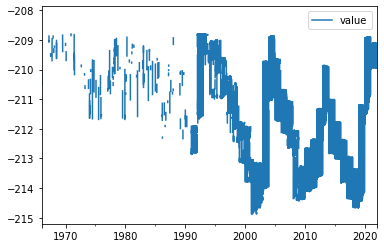

In [109]:
kinneret.plot()

In [110]:
kinneret['value'].isna().mean()

0.5348905538416336

In [111]:
min_value = kinneret['value'].min()

In [112]:
filt = kinneret['value'] == min_value
kinneret[filt]

,value
2001-11-25,-214.87
2001-11-26,-214.87
2001-11-27,-214.87
2001-11-28,-214.87
2001-11-29,-214.87


In [113]:
max_value = kinneret['value'].max()

In [114]:
filt = kinneret['value'] == max_value
kinneret[filt]

,value
1969-01-27,-208.2
